In [1]:
# Cell 1: Imports
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
import pennylane as qml

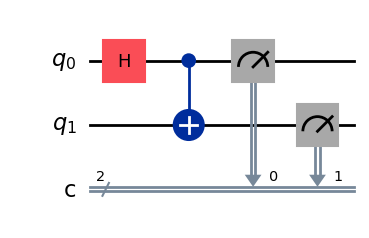

In [2]:
#cell 2: Basic Quantum Circuit Example
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
qc.draw('mpl')

Quantum Circuit for Bell State:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
Counts from the simulation: {'11': 505, '00': 519}


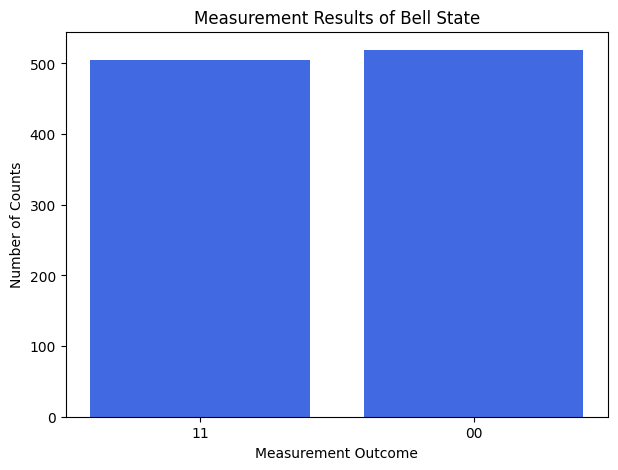

In [3]:
# Cell 3: Quantum Circuit - Bell State (Superposition + Entanglement)
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import matplotlib.pyplot as plt

qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

print("Quantum Circuit for Bell State:")
print(qc)

simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts(qc)

print(f"Counts from the simulation: {counts}")

if counts:
    states = list(counts.keys())
    values = list(counts.values())

    plt.figure(figsize=(7, 5))
    plt.bar(states, values, color='royalblue')
    plt.xlabel("Measurement Outcome")
    plt.ylabel("Number of Counts")
    plt.title("Measurement Results of Bell State")
    plt.show()

In [4]:
# Cell 4: Visualize the quantum state before measurement
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qc_no_meas = QuantumCircuit(2)
qc_no_meas.h(0)
qc_no_meas.cx(0, 1)

state = Statevector.from_instruction(qc_no_meas)
fig = plot_bloch_multivector(state)
fig.savefig("bloch_visualization.png")

print("Plot saved to bloch_visualization.png")

Plot saved to bloch_visualization.png


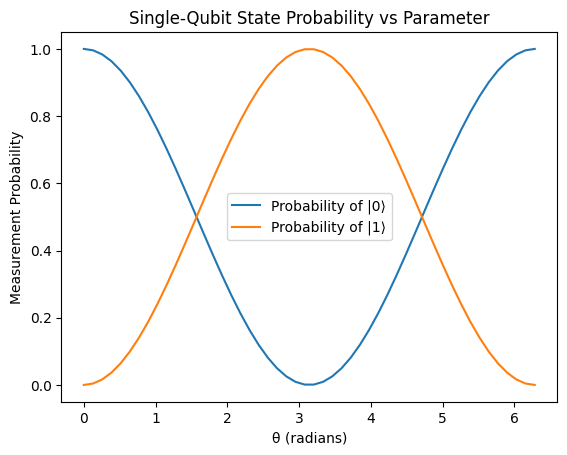

Optimal angle for maximum |1⟩ probability: 3.08 radians


In [5]:
# Cell 5: Mini AI-Inspired Optimization: Parameter Sweep for a Single Qubit
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def circuit(theta):
    qml.RY(theta, wires=0)
    return qml.probs(wires=0)

angles = np.linspace(0, 2 * np.pi, 50)
probs = [circuit(a) for a in angles]
probs0 = [p[0] for p in probs]
probs1 = [p[1] for p in probs]

plt.figure()
plt.plot(angles, probs0, label='Probability of |0⟩')
plt.plot(angles, probs1, label='Probability of |1⟩')
plt.xlabel("θ (radians)")
plt.ylabel("Measurement Probability")
plt.title("Single-Qubit State Probability vs Parameter")
plt.legend()
plt.show()

optimal_theta = angles[np.argmax(probs1)]
print(f"Optimal angle for maximum |1⟩ probability: {optimal_theta:.2f} radians")

In [6]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

def custom_bell_state(x_gate_first=False):
    qc = QuantumCircuit(2, 2)
    if x_gate_first:
        qc.x(0)
    qc.h(0)
    qc.cx(0, 1)
    qc.measure([0, 1], [0, 1])
    return qc

qc1 = custom_bell_state(x_gate_first=False)
qc2 = custom_bell_state(x_gate_first=True)

print("--- Circuit 1: Standard Bell State (|Φ+>) ---")
print(qc1)

print("\n--- Circuit 2: Bell State with initial X-gate (|Φ->) ---")
print(qc2)

simulator = AerSimulator()

print("\n--- Running Simulation for Circuit 1 ---")
job1 = simulator.run(qc1)
result1 = job1.result()
counts1 = result1.get_counts(qc1)
print("Measurement Counts for qc1:", counts1)

print("\n--- Running Simulation for Circuit 2 ---")
job2 = simulator.run(qc2)
result2 = job2.result()
counts2 = result2.get_counts(qc2)
print("Measurement Counts for qc2:", counts2)

--- Circuit 1: Standard Bell State (|Φ+>) ---
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

--- Circuit 2: Bell State with initial X-gate (|Φ->) ---
     ┌───┐┌───┐     ┌─┐   
q_0: ┤ X ├┤ H ├──■──┤M├───
     └───┘└───┘┌─┴─┐└╥┘┌─┐
q_1: ──────────┤ X ├─╫─┤M├
               └───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1 

--- Running Simulation for Circuit 1 ---
Measurement Counts for qc1: {'11': 529, '00': 495}

--- Running Simulation for Circuit 2 ---
Measurement Counts for qc2: {'00': 494, '11': 530}


Simulation results: {'11': 505, '00': 519}


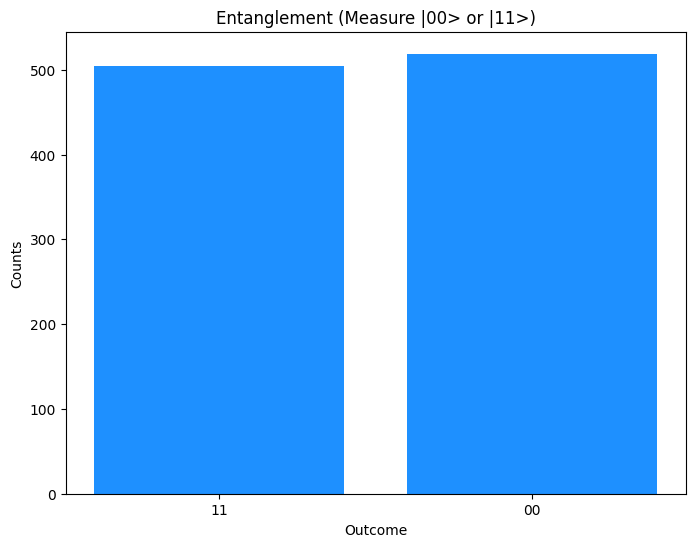

In [7]:
# Cell 7: Entanglement Visualization
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import matplotlib.pyplot as plt

def custom_bell_state(x_gate_first=False):
    qc = QuantumCircuit(2, 2)
    if x_gate_first:
        qc.x(0)
    qc.h(0)
    qc.cx(0, 1)
    qc.measure([0, 1], [0, 1])
    return qc

simulator = Aer.get_backend('qasm_simulator')
qc1 = custom_bell_state(x_gate_first=False)
compiled_circuit = transpile(qc1, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts(qc1)

print(f"Simulation results: {counts}")

if counts:
    states = list(counts.keys())
    values = list(counts.values())

    plt.figure(figsize=(8, 6))
    plt.bar(states, values, color='dodgerblue')
    plt.xlabel("Outcome")
    plt.ylabel("Counts")
    plt.title("Entanglement (Measure |00> or |11>)")
    plt.show()

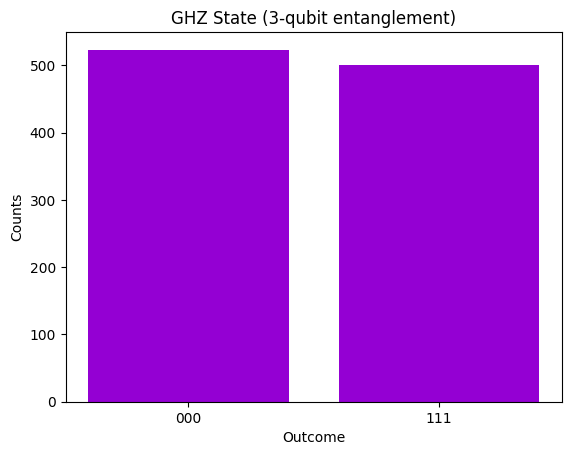

In [8]:
# Cell 8: GHZ State Circuit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import matplotlib.pyplot as plt

qc_ghz = QuantumCircuit(3, 3)
qc_ghz.h(0)
qc_ghz.cx(0, 1)
qc_ghz.cx(1, 2)
qc_ghz.measure([0, 1, 2], [0, 1, 2])

qc_ghz.draw('mpl')
plt.show()

simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc_ghz, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts(qc_ghz)

if counts:
    states = list(counts.keys())
    values = list(counts.values())

    plt.figure()
    plt.bar(states, values, color='darkviolet')
    plt.xlabel("Outcome")
    plt.ylabel("Counts")
    plt.title("GHZ State (3-qubit entanglement)")
    plt.show()

Running simulations for various circuit depths...
  Depth  1: Ideal Prob='1' -> 0.507, Depolarizing Prob='1' -> 0.492, Thermal Prob='1' -> 0.506
  Depth  5: Ideal Prob='1' -> 0.497, Depolarizing Prob='1' -> 0.489, Thermal Prob='1' -> 0.502
  Depth 10: Ideal Prob='1' -> 1.000, Depolarizing Prob='1' -> 1.000, Thermal Prob='1' -> 1.000
  Depth 15: Ideal Prob='1' -> 0.506, Depolarizing Prob='1' -> 0.518, Thermal Prob='1' -> 0.506
  Depth 20: Ideal Prob='1' -> 0.000, Depolarizing Prob='1' -> 0.000, Thermal Prob='1' -> 0.000
  Depth 25: Ideal Prob='1' -> 0.483, Depolarizing Prob='1' -> 0.518, Thermal Prob='1' -> 0.521
  Depth 30: Ideal Prob='1' -> 1.000, Depolarizing Prob='1' -> 1.000, Thermal Prob='1' -> 1.000
  Depth 40: Ideal Prob='1' -> 0.000, Depolarizing Prob='1' -> 0.000, Thermal Prob='1' -> 0.000
  Depth 50: Ideal Prob='1' -> 1.000, Depolarizing Prob='1' -> 1.000, Thermal Prob='1' -> 1.000

Simulations complete. Plotting results.


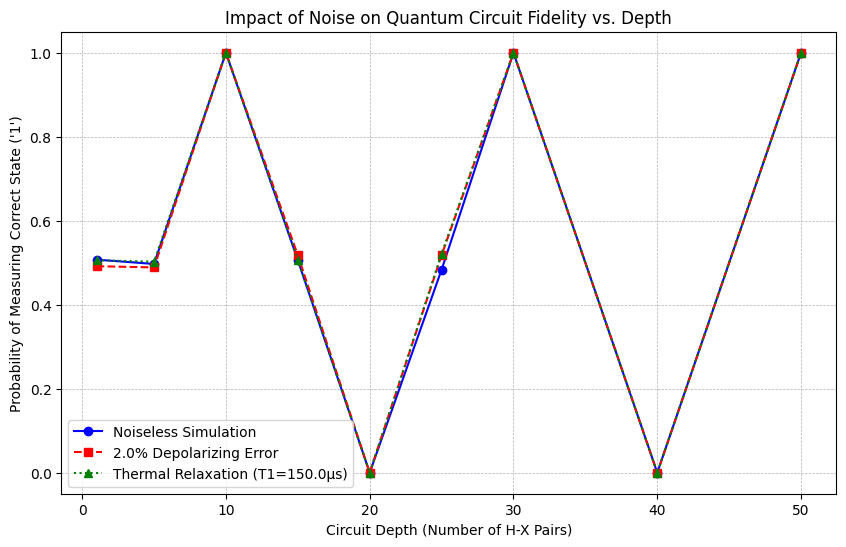

In [9]:
# Cell 9: Noise Models and Their Impact on Circuit Fidelity
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel, depolarizing_error, thermal_relaxation_error

def make_deep_circuit(depth):
    qc = QuantumCircuit(1, 1)
    for _ in range(depth):
        qc.h(0)
        qc.x(0)
    qc.measure(0, 0)
    return qc

p_error_depolarizing = 0.02
error_depolarizing = depolarizing_error(p_error_depolarizing, 1)
noise_model_depolarizing = NoiseModel()
noise_model_depolarizing.add_all_qubit_quantum_error(error_depolarizing, ['h', 'x'])

t1_us = 150.0
t2_us = 300.0
gate_time_ns = 50
time_h = gate_time_ns * 1e-3
time_x = gate_time_ns * 1e-3
error_thermal = thermal_relaxation_error(t1_us, t2_us, time_h)
noise_model_thermal = NoiseModel()
noise_model_thermal.add_all_qubit_quantum_error(error_thermal, ['h', 'x'])

noiseless_simulator = AerSimulator()
noisy_depolarizing_simulator = AerSimulator(noise_model=noise_model_depolarizing)
noisy_thermal_simulator = AerSimulator(noise_model=noise_model_thermal)

circuit_depths = [1, 5, 10, 15, 20, 25, 30, 40, 50]
shots = 2048

results_noiseless = []
results_noisy_depolarizing = []
results_noisy_thermal = []

print("Running simulations for various circuit depths...")

for depth in circuit_depths:
    qc = make_deep_circuit(depth)
    
    compiled_circuit = transpile(qc, noiseless_simulator)
    
    result_ideal = noiseless_simulator.run(compiled_circuit, shots=shots).result()
    counts_ideal = result_ideal.get_counts(0)
    prob_ideal = counts_ideal.get('1', 0) / shots
    results_noiseless.append(prob_ideal)

    result_depolarizing = noisy_depolarizing_simulator.run(compiled_circuit, shots=shots).result()
    counts_depolarizing = result_depolarizing.get_counts(0)
    prob_depolarizing = counts_depolarizing.get('1', 0) / shots
    results_noisy_depolarizing.append(prob_depolarizing)

    result_thermal = noisy_thermal_simulator.run(compiled_circuit, shots=shots).result()
    counts_thermal = result_thermal.get_counts(0)
    prob_thermal = counts_thermal.get('1', 0) / shots
    results_noisy_thermal.append(prob_thermal)
    
    print(f"  Depth {depth:2d}: Ideal Prob='1' -> {prob_ideal:.3f}, Depolarizing Prob='1' -> {prob_depolarizing:.3f}, Thermal Prob='1' -> {prob_thermal:.3f}")

print("\nSimulations complete. Plotting results.")

plt.figure(figsize=(10, 6))
plt.plot(circuit_depths, results_noiseless, 'o-', label='Noiseless Simulation', color='blue')
plt.plot(circuit_depths, results_noisy_depolarizing, 's--', label=f'{p_error_depolarizing*100}% Depolarizing Error', color='red')
plt.plot(circuit_depths, results_noisy_thermal, '^:', label=f'Thermal Relaxation (T1={t1_us}µs)', color='green')

plt.title('Impact of Noise on Quantum Circuit Fidelity vs. Depth')
plt.xlabel('Circuit Depth (Number of H-X Pairs)')
plt.ylabel("Probability of Measuring Correct State ('1')")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.ylim([-0.05, 1.05])
plt.show()


In [10]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2, 2)

qc.h([0, 1])

qc.cz(0, 1)

qc.h([0, 1])
qc.x([0, 1])
qc.cz(0, 1)
qc.x([0, 1])
qc.h([0, 1])

qc.measure([0, 1], [0, 1])

simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(compiled_circuit)

fig = plot_histogram(counts, title="Grover Result: Amplified Marked State |11>")
plt.show()


In [11]:
# Cell 11: Variational Quantum Eigensolver (VQE) Example
import pennylane as qml
import numpy as np
from scipy.optimize import minimize

dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def vqe_circuit(theta):
    qml.RY(theta, wires=0)
    return qml.expval(qml.PauliZ(0))

def cost(theta):
    return vqe_circuit(theta)

init_theta = np.array(0.6)
result = minimize(cost, init_theta, method='COBYLA')
print("Optimized theta:", result.x)


Optimized theta: [3.1416]
